<a href="https://colab.research.google.com/github/shihapalden/ML-Projects/blob/main/Productivity_Score_Prediction_from_Mental_%26_Lifestyle_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [9]:
data = pd.read_csv('mental_health_productivity_dataset.csv')
data.head()

,Sleep_Hours,Stress_Level,Physical_Activity_Min,Work_Hours,Mood_Score,Productivity_Score
0,8.8,3.7,28.0,8.3,6.8,86.4
1,6.7,5.7,13.0,6.3,9.3,68.0
2,7.2,6.2,38.0,9.4,7.2,77.5
3,6.5,4.9,33.0,7.7,6.0,70.7
4,6.4,4.4,35.0,7.6,6.4,78.9


In [70]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sleep_Hours            100 non-null    float64
 1   Stress_Level           100 non-null    float64
 2   Physical_Activity_Min  100 non-null    float64
 3   Work_Hours             100 non-null    float64
 4   Mood_Score             100 non-null    float64
 5   Productivity_Score     100 non-null    float64
dtypes: float64(6)
memory usage: 4.8 KB
None


In [71]:
print(data.describe())

       Sleep_Hours  Stress_Level  ...  Mood_Score  Productivity_Score
count   100.000000    100.000000  ...   100.00000           100.00000
mean      7.606000      4.175000  ...     6.76200            83.07300
std       1.040185      1.786955  ...     1.54807            11.77423
min       4.900000      1.000000  ...     2.80000            54.20000
25%       6.975000      2.800000  ...     5.67500            75.67500
50%       7.600000      4.200000  ...     6.85000            81.75000
75%       8.400000      5.425000  ...     8.10000            93.37500
max       9.500000      8.200000  ...    10.00000           100.00000

[8 rows x 6 columns]


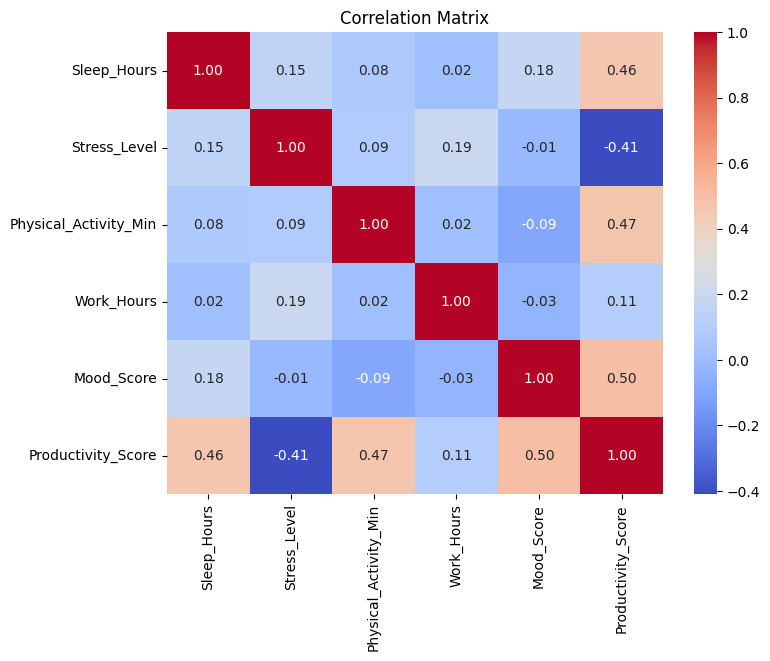

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [74]:
X = data.drop('Productivity_Score', axis=1)
Y = data['Productivity_Score']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [75]:
print(f'Training Samples: {len(X_train)}')
print(f'Test Samples: {len(Y_test)}')

Training Samples: 80
Test Samples: 20


In [76]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [77]:
print('Intercept:', model.intercept_)
print('Cofficients', model.coef_)

Intercept: 7.057848642210203
Cofficients [ 4.71299833 -3.66659237  0.40997661  1.80645704  3.75154102]


In [78]:
Y_pred = model.predict(X_test)

In [79]:
r2 = r2_score(Y_test, Y_pred)

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1-(1 - r2) * (n - 1) / (n - p - 1)

In [80]:
mse =  mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.9278
Adjusted R²: 0.9020
MSE: 12.9919
RMSE: 3.6044


In [86]:
new_data = pd.DataFrame([{
    'Sleep_Hours': 7.5,
    'Stress_Level': 3.0,
    'Physical_Activity_Min': 60,
    'Work_Hours': 7.5,
    'Mood_Score': 8.5
}])

predicted_score = model.predict(new_data)
clipped_score = np.clip(predicted_score[0], 0, 100)
print(f"Predicted Productivity Score: {clipped_score:.2f}")

Predicted Productivity Score: 100.00
